Primeira questão

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.nn import functional as F

In [2]:
class FeedForward(nn.Module):


    def __init__(self,input_dim, hidden_dim, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        return out

In [3]:
from sklearn.model_selection import train_test_split
dset_1questao = np.genfromtxt('dados-ex5.txt',delimiter=',')
dset_1questao = torch.from_numpy(dset_1questao)
dset_1questao.shape

x = dset_1questao[:,:-1]
y = dset_1questao[:,-1]

x = torch.FloatTensor(x.float())
y = torch.FloatTensor(y.float())

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4, random_state=100)

input = 2

output = 10
hidden = 100

model = FeedForward(input, hidden,output)

In [4]:
batch_size = 64


train_ds = torch.utils.data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))
test_ds = torch.utils.data.TensorDataset(torch.tensor(X_test), torch.tensor(Y_test))

trainset = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
testset = torch.utils.data.DataLoader(test_ds, batch_size=360, shuffle=True)

<ipython-input-4-dd2a5cd346bf>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_ds = torch.utils.data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))
<ipython-input-4-dd2a5cd346bf>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_ds = torch.utils.data.TensorDataset(torch.tensor(X_test), torch.tensor(Y_test))


In [5]:
loss_func = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [6]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=100, max_iter=400).fit(X_train, Y_train)
clf.predict_proba(X_test[:,:])
clf.score(X_test, Y_test)

/home/raul/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9861111111111112

In [7]:
train_losses, test_losses = [], []
Y_test.shape

torch.Size([360])

In [8]:
total_loss = 0
for epoch in range(100): 
    model.train()
    total_loss = 0
    for data in trainset:  
        X, y = data  

        y = y.type(torch.LongTensor)
        
        optimizer.zero_grad()  
        output = model(X)  
        loss = loss_func(output, y)  
        loss.backward()  
        optimizer.step()  
        total_loss += loss.data
    print(total_loss)
    if epoch % 1 == 0:
        model.eval()
        test_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testset:
                
                X, labels = data
                
                outputs = model(X)
        

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)


                test_loss += (predicted !=labels).sum()
                correct += (predicted == labels).sum()
            accuracy = 100.0 * correct / total
            train_losses.append(total_loss.item()/len(trainset))
            test_losses.append(test_loss.item()/len(testset))

            
            print(f'Epoca:{epoch}, Loss: {total_loss.item():.3f},Acuracia:{accuracy.item():.3f}')

tensor(20.2067)
Epoca:0, Loss: 20.207,Acuracia:69.444
tensor(15.9561)
Epoca:1, Loss: 15.956,Acuracia:82.778
tensor(12.8035)
Epoca:2, Loss: 12.803,Acuracia:83.056
tensor(10.6462)
Epoca:3, Loss: 10.646,Acuracia:83.056
tensor(9.0708)
Epoca:4, Loss: 9.071,Acuracia:83.056
tensor(7.8752)
Epoca:5, Loss: 7.875,Acuracia:83.333
tensor(7.1662)
Epoca:6, Loss: 7.166,Acuracia:83.611
tensor(6.5009)
Epoca:7, Loss: 6.501,Acuracia:84.722
tensor(6.0290)
Epoca:8, Loss: 6.029,Acuracia:85.000
tensor(5.6487)
Epoca:9, Loss: 5.649,Acuracia:85.000
tensor(5.3098)
Epoca:10, Loss: 5.310,Acuracia:85.000
tensor(5.0920)
Epoca:11, Loss: 5.092,Acuracia:85.000
tensor(4.8303)
Epoca:12, Loss: 4.830,Acuracia:85.278
tensor(4.6406)
Epoca:13, Loss: 4.641,Acuracia:85.556
tensor(4.4478)
Epoca:14, Loss: 4.448,Acuracia:85.556
tensor(4.4197)
Epoca:15, Loss: 4.420,Acuracia:85.833
tensor(4.2162)
Epoca:16, Loss: 4.216,Acuracia:85.833
tensor(4.1628)
Epoca:17, Loss: 4.163,Acuracia:85.833
tensor(4.1123)
Epoca:18, Loss: 4.112,Acuracia:86

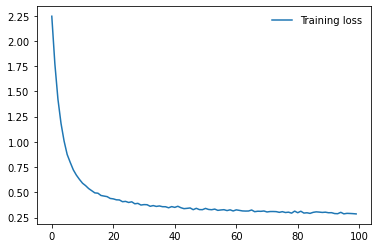

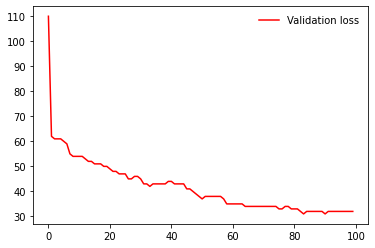

In [9]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.legend(frameon=False)
plt.show()

plt.plot(test_losses, label='Validation loss', color = 'r')
plt.legend(frameon=False)
plt.show()

Segunda questão

In [10]:
train_dataset = datasets.FashionMNIST(root='./data',
                                   train=True,
                                   transform=transforms.ToTensor(),
                                   download=True)

test_dataset = datasets.FashionMNIST(root='./data',
                                  train=False,
                                  transform=transforms.ToTensor())

In [11]:
batch_size = 64 

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [12]:
input_dim = 28*28
output_dim = 10
hidden_dim = 100

model = FeedForward(input_dim, hidden_dim, output_dim)


loss_func = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
losses = []

In [13]:
for epoch in range(50):
    model.train()
    total_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1,28*28)
        labels = labels
        
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = loss_func(outputs, labels)
        
        loss.backward()
        total_loss += loss
        optimizer.step()
        
    if epoch % 1 == 0:
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                
                images = images.view(-1, 28*28)
                
                outputs = model(images)
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                
                correct += (predicted == labels).sum()
            accuracy = 100.0 * correct / total
            losses.append(total_loss.item())
            print(f'Epoca:{epoch}, Loss: {total_loss.item():.3f},Acuracia:{accuracy.item():.3f}')

Epoca:0, Loss: 1071.097,Acuracia:74.010
Epoca:1, Loss: 630.439,Acuracia:79.445
Epoca:2, Loss: 540.571,Acuracia:81.957
Epoca:3, Loss: 496.563,Acuracia:82.785
Epoca:4, Loss: 469.910,Acuracia:83.275
Epoca:5, Loss: 451.907,Acuracia:83.980
Epoca:6, Loss: 438.393,Acuracia:84.238
Epoca:7, Loss: 426.958,Acuracia:83.992
Epoca:8, Loss: 418.577,Acuracia:84.845
Epoca:9, Loss: 410.959,Acuracia:85.140
Epoca:10, Loss: 404.147,Acuracia:85.020
Epoca:11, Loss: 398.251,Acuracia:85.612
Epoca:12, Loss: 392.450,Acuracia:85.537
Epoca:13, Loss: 386.792,Acuracia:85.380
Epoca:14, Loss: 382.461,Acuracia:85.717
Epoca:15, Loss: 377.798,Acuracia:86.048
Epoca:16, Loss: 374.280,Acuracia:86.275
Epoca:17, Loss: 369.974,Acuracia:86.450
Epoca:18, Loss: 366.772,Acuracia:86.693
Epoca:19, Loss: 362.928,Acuracia:86.615
Epoca:20, Loss: 360.123,Acuracia:86.395
Epoca:21, Loss: 356.229,Acuracia:86.613
Epoca:22, Loss: 353.753,Acuracia:86.967
Epoca:23, Loss: 350.825,Acuracia:86.980
Epoca:24, Loss: 347.416,Acuracia:87.197
Epoca:25,

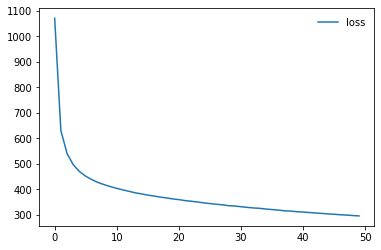

In [14]:
plt.plot(losses, label='loss')
plt.legend(frameon=False)
plt.show()